In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Estilo de visualización
sns.set_theme(style="whitegrid")

In [3]:
# Cargar datos filtrados
df_aire = pd.read_csv('../datos/aire_filtrado_caribe.csv')

In [4]:
# Inspección rápida
print("Columnas disponibles:", df_aire.columns)
print("\n-------------------------------------------------------------------------------")
print(df_aire.head())

Columnas disponibles: Index(['id_estacion', 'autoridad_ambiental', 'estacion', 'latitud', 'longitud',
       'variable', 'unidades', 'tiempo_exposicion', 'anio', 'promedio', 'suma',
       'n_datos', 'representatividad', 'excedencias', 'porcentaje_excedencias',
       'mediana', 'percentil_98', 'maximo', 'fecha_maximo', 'minimo',
       'fecha_minimo', 'dias_excedencias', 'cod_departamento', 'departamento',
       'cod_municipio', 'municipio', 'tipo_estacion', 'ubicacion'],
      dtype='object')

-------------------------------------------------------------------------------
   id_estacion autoridad_ambiental             estacion   latitud   longitud  \
0         9049          CORPOCESAR       ZM11 MINGUILLO  9.940778 -73.500592   
1         9044          CORPOCESAR             BOQUERÓN  9.631167 -73.422944   
2         9051          CORPOCESAR           EL HATILLO  9.648750 -73.570028   
3         9053          CORPOCESAR  ESTACIÓN CHIRIGUANÁ  9.363639 -73.607083   
4         9043    

In [5]:
df_aire['departamento'].unique()

array(['CESAR', 'CÓRDOBA', 'BOLÍVAR'], dtype=object)

In [6]:
# Convertir columna de año a entero (si es necesario)
df_aire['anio'] = df_aire['anio'].astype(int)

In [7]:
df_aire['variable'].unique()

array(['PM10', 'PST', 'PLiquida', 'DViento', 'P', 'RGlobal', 'TAire2',
       'VViento', 'PM2.5', 'HAire2', 'O3', 'SO2', 'NO2', 'CO'],
      dtype=object)

In [8]:
# Contaminantes más comunes a analizar (ajusta si tienes otros)
contaminantes = ['PM10', 'O3', 'PST', 'P', 'PM2.5', 'TAire2', 'SO2', 'NO2', 'CO',
       'HAire2', 'DViento', 'RGlobal', 'VViento']

In [9]:
df_aire.isnull().sum()

id_estacion                0
autoridad_ambiental        0
estacion                   0
latitud                    0
longitud                   0
variable                   0
unidades                   0
tiempo_exposicion          0
anio                       0
promedio                   0
suma                       0
n_datos                    0
representatividad         20
excedencias                0
porcentaje_excedencias     0
mediana                    0
percentil_98               0
maximo                     0
fecha_maximo               0
minimo                     0
fecha_minimo               0
dias_excedencias           0
cod_departamento           0
departamento               0
cod_municipio              0
municipio                  0
tipo_estacion              0
ubicacion                  0
dtype: int64

In [10]:
df_aire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_estacion             1530 non-null   int64  
 1   autoridad_ambiental     1530 non-null   object 
 2   estacion                1530 non-null   object 
 3   latitud                 1530 non-null   float64
 4   longitud                1530 non-null   float64
 5   variable                1530 non-null   object 
 6   unidades                1530 non-null   object 
 7   tiempo_exposicion       1530 non-null   int64  
 8   anio                    1530 non-null   int64  
 9   promedio                1530 non-null   float64
 10  suma                    1530 non-null   float64
 11  n_datos                 1530 non-null   int64  
 12  representatividad       1510 non-null   float64
 13  excedencias             1530 non-null   int64  
 14  porcentaje_excedencias  1530 non-null   

In [11]:
df_aire['representatividad'].unique()

array([ 53.,  74.,  84.,  95.,  51.,  58.,  92.,  41.,  86.,  75.,  82.,
        93.,  55.,   4.,  31.,  83.,  80.,  96.,  99.,  88.,  79.,  26.,
        78.,  94.,  25.,  48.,  85.,  36.,  40.,  50.,  67.,  90.,  91.,
        49.,  19.,   2.,  63.,  89.,  97.,  69.,  77.,  70.,  66.,  39.,
        24.,  22.,  30.,  52.,  21.,  62.,  47., 112.,  81.,  57.,  23.,
        20.,  29.,  76.,   1.,  56.,  44.,   8.,  98.,  64.,  59.,  28.,
        60.,  87.,  27.,   7.,  68.,  10.,   5.,  16.,   3., 100.,  71.,
        35.,  65.,  11.,  nan,  73.,  42.,   0.,  15.,  33.,  46.,  45.,
        14.,  34.,  32.,  17.,  54.,  43.,  13.,  72.])

In [12]:
# Ver cuántos y cuáles son
df_aire[df_aire['representatividad'].isna()]

,id_estacion,autoridad_ambiental,estacion,latitud,longitud,variable,unidades,tiempo_exposicion,anio,promedio,...,fecha_maximo,minimo,fecha_minimo,dias_excedencias,cod_departamento,departamento,cod_municipio,municipio,tipo_estacion,ubicacion
347,26288,CVS,UPB,8.804631,-75.850537,PM10,ugm3,24,2016,25.6,...,27/07/2016,3.6,22/06/2016,0,23,CÓRDOBA,23001.0,MONTERÍA,Indicativa,POINT (-75.850537 8.804631)
352,29962,CVS,TERMINAL,8.749223,-75.867824,PM10,ugm3,24,2016,37.8,...,27/07/2016,1.4,23/06/2016,0,23,CÓRDOBA,23001.0,MONTERÍA,Indicativa,POINT (-75.867824 8.749223)
500,29384,CVS,UNISINU,8.767719,-75.885472,PM10,ugm3,24,2018,42.3,...,17/07/2018,5.2,18/08/2018,5,23,CÓRDOBA,23001.0,MONTERÍA,Indicativa,POINT (-75.885472 8.767719)
502,31530,CVS,LA GLORIA,8.726230,-75.889661,PM10,ugm3,24,2018,43.1,...,16/07/2018,7.6,13/10/2018,3,23,CÓRDOBA,23001.0,MONTERÍA,Fija,POINT (-75.889661 8.7262305)
503,26288,CVS,UPB,8.804631,-75.850537,PM10,ugm3,24,2018,43.2,...,2/10/2018,0.8,15/11/2018,8,23,CÓRDOBA,23001.0,MONTERÍA,Indicativa,POINT (-75.850537 8.804631)
505,29962,CVS,TERMINAL,8.749223,-75.867824,PM10,ugm3,24,2018,45.7,...,2/10/2018,7.6,23/04/2018,2,23,CÓRDOBA,23001.0,MONTERÍA,Indicativa,POINT (-75.867824 8.749223)
537,29384,CVS,UNISINU,8.767719,-75.885472,PM10,ugm3,24,2019,30.2,...,17/09/2019,10.9,9/08/2019,0,23,CÓRDOBA,23001.0,MONTERÍA,Indicativa,POINT (-75.885472 8.767719)
539,26288,CVS,UPB,8.804631,-75.850537,PM10,ugm3,24,2019,32.9,...,19/06/2019,11.4,10/09/2019,0,23,CÓRDOBA,23001.0,MONTERÍA,Indicativa,POINT (-75.850537 8.804631)
543,29962,CVS,TERMINAL,8.749223,-75.867824,PM10,ugm3,24,2019,38.2,...,28/06/2019,3.7,31/08/2019,0,23,CÓRDOBA,23001.0,MONTERÍA,Indicativa,POINT (-75.867824 8.749223)
550,31530,CVS,LA GLORIA,8.726230,-75.889661,PM10,ugm3,24,2019,48.5,...,5/07/2019,16.2,25/06/2019 - 26/06/2019,12,23,CÓRDOBA,23001.0,MONTERÍA,Fija,POINT (-75.889661 8.7262305)


In [13]:
# Cantidad de datos nan en el campo representatividad
df_aire['representatividad'].isna().sum()

np.int64(20)

In [ ]:
# Eliminar los registros con NaN en representatividad
#df_aire = df_aire.dropna(subset=['representatividad'])

In [ ]:
# Imputar un valor promedio (si el porcentaje es importante)
#media_rep = df_aire['representatividad'].mean()
#df_aire['representatividad'] = df_aire['representatividad'].fillna(media_rep)

In [14]:
df_aire['variable'].unique()

array(['PM10', 'PST', 'PLiquida', 'DViento', 'P', 'RGlobal', 'TAire2',
       'VViento', 'PM2.5', 'HAire2', 'O3', 'SO2', 'NO2', 'CO'],
      dtype=object)

In [15]:
df_aire['anio'].unique()

array([2011, 2012, 2014, 2015, 2013, 2016, 2017, 2018, 2020, 2019, 2021,
       2022, 2023])

In [16]:
df_aire['promedio'].unique()

array([1.75000e+01, 8.41000e+01, 8.70000e+01, 6.10000e+00, 4.36000e+01,
       1.99400e+02, 8.20000e+00, 7.56000e+02, 6.93000e+01, 1.99700e+02,
       2.71000e+01, 1.00000e+00, 1.38000e+02, 7.55000e+01, 8.93000e+01,
       4.66000e+01, 1.48300e+02, 3.55000e+01, 1.21000e+01, 1.28000e+01,
       1.49000e+01, 2.47000e+01, 2.59000e+01, 2.64000e+01, 2.70000e+01,
       2.72000e+01, 2.80000e+01, 3.02000e+01, 3.28000e+01, 3.73000e+01,
       3.86000e+01, 4.05000e+01, 4.13000e+01, 8.12000e+01, 5.84000e+01,
       6.59000e+01, 8.45000e+01, 8.68000e+01, 9.78000e+01, 3.40000e+00,
       5.02000e+01, 1.84100e+02, 5.40000e+00, 7.54800e+02, 7.80000e+01,
       2.23500e+02, 2.81000e+01, 1.20000e+00, 1.22700e+02, 4.40000e+00,
       8.03000e+01, 9.61000e+01, 6.16000e+01, 1.62400e+02, 7.41000e+01,
       1.34000e+01, 1.46000e+01, 1.58000e+01, 1.88000e+01, 2.86000e+01,
       2.89000e+01, 3.06000e+01, 3.24000e+01, 3.26000e+01, 3.76000e+01,
       3.83000e+01, 3.87000e+01, 3.90000e+01, 7.63000e+01, 4.810

In [17]:
df_aire['promedio'].isna().sum()

np.int64(0)

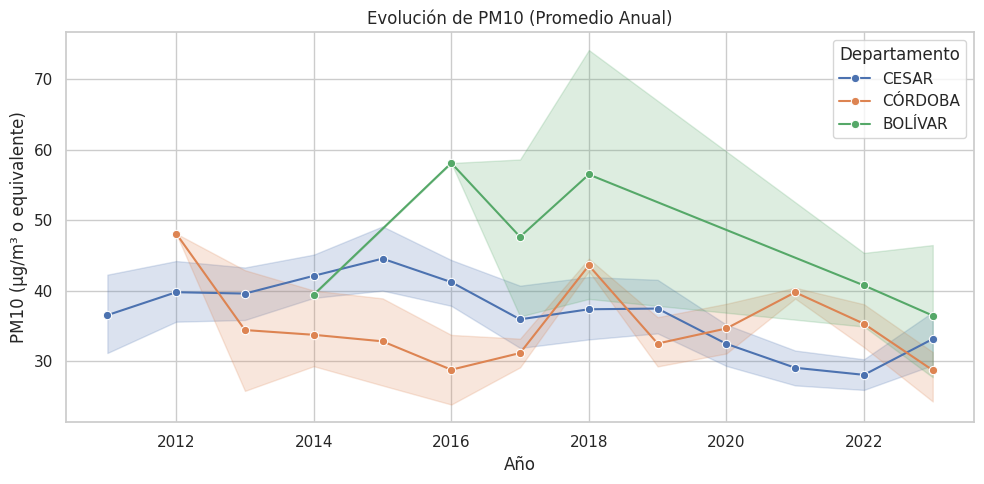

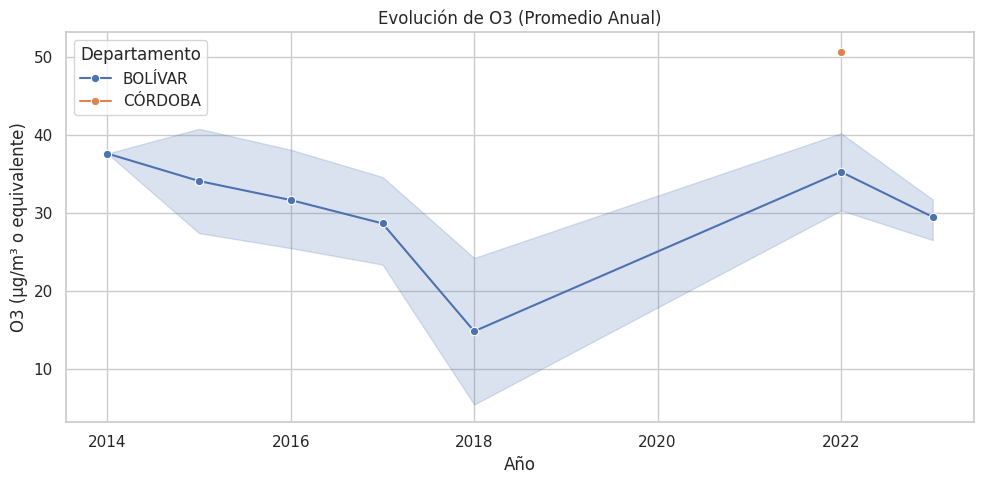

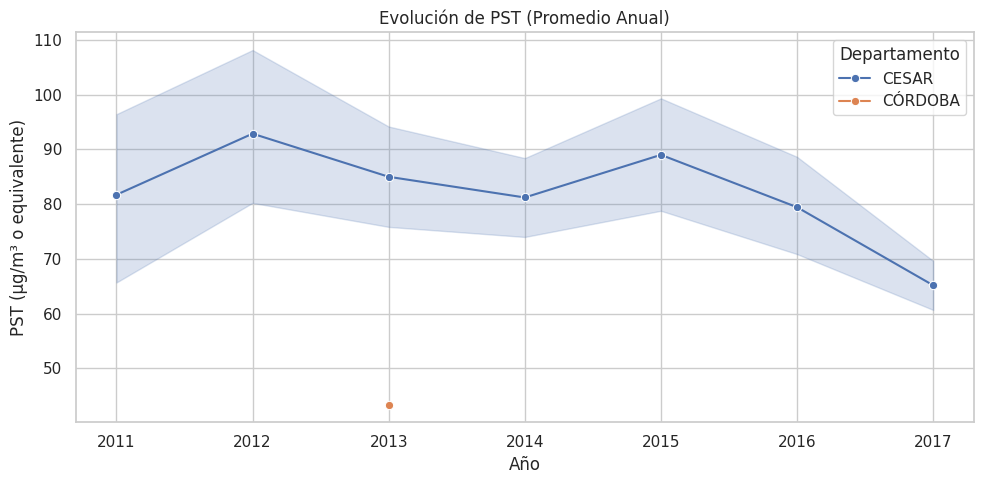

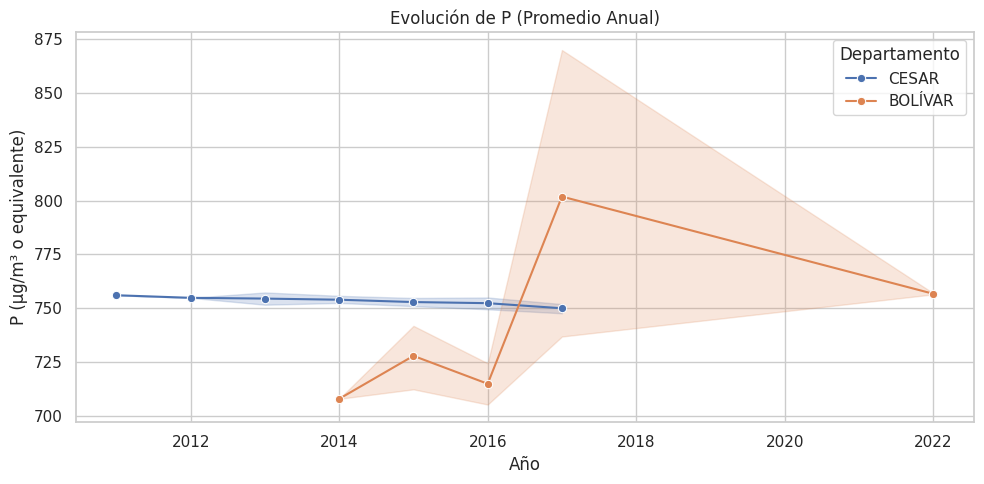

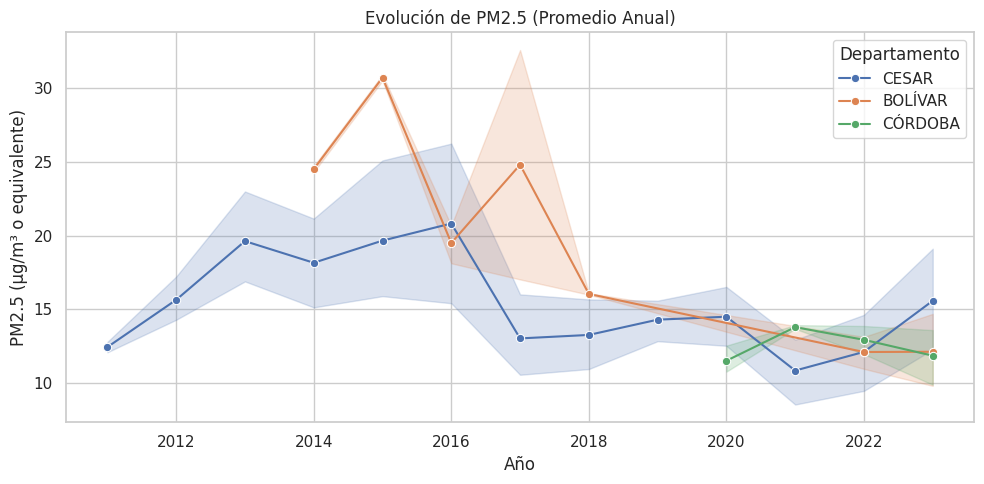

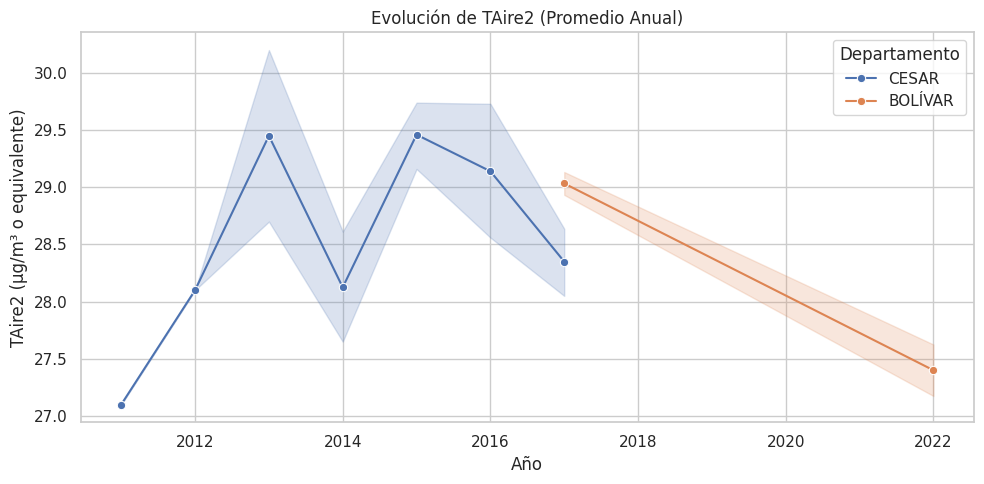

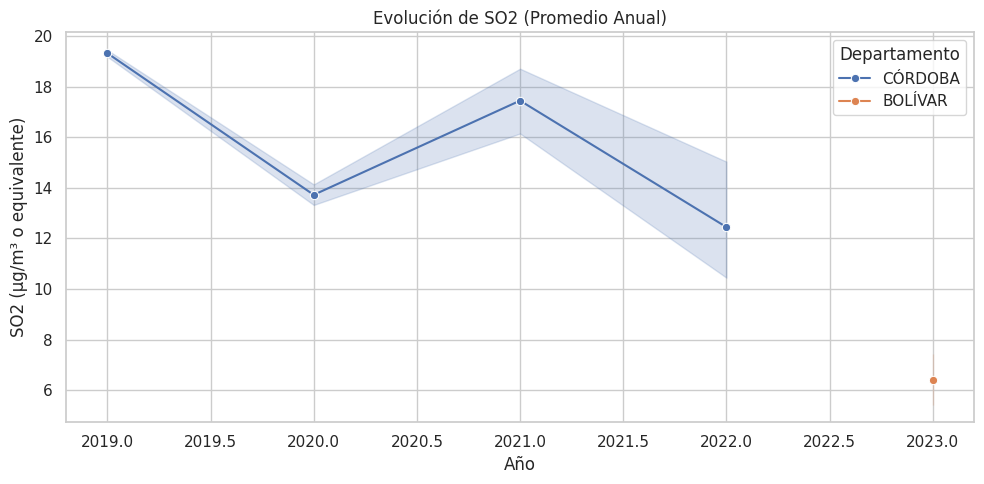

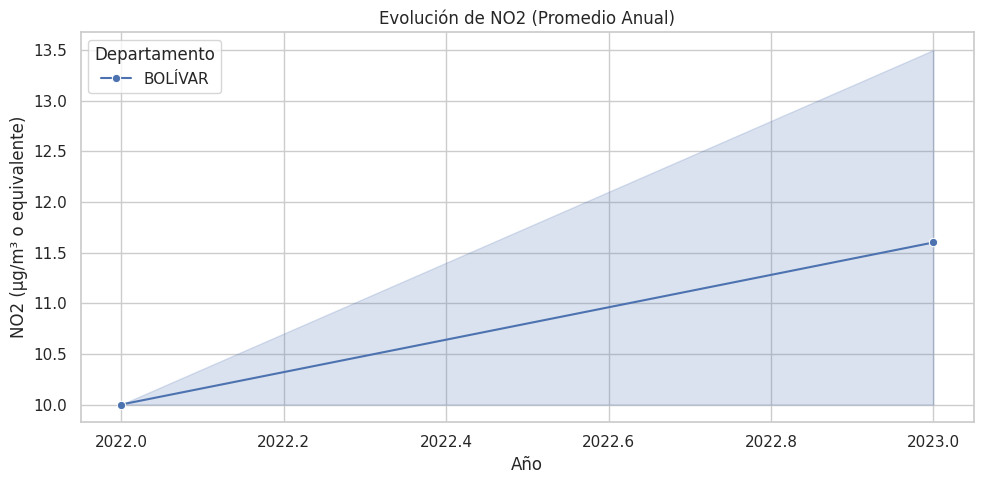

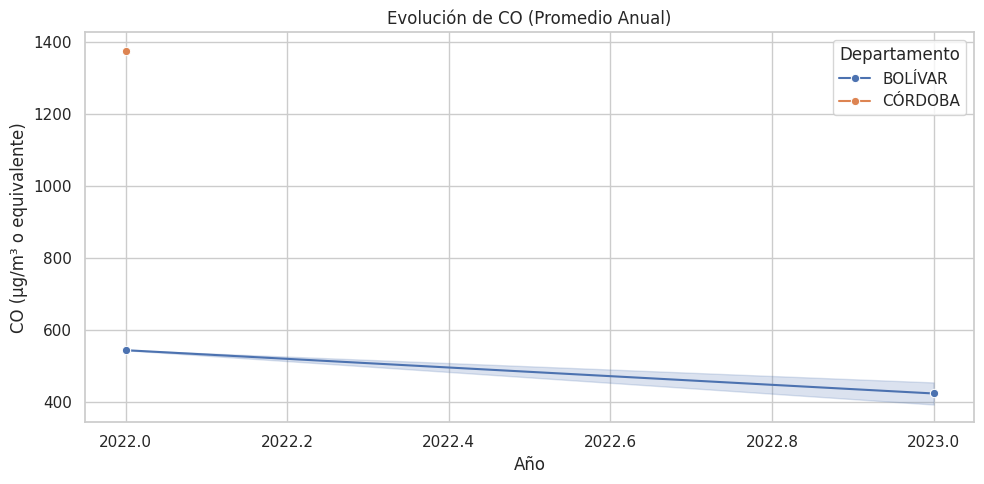

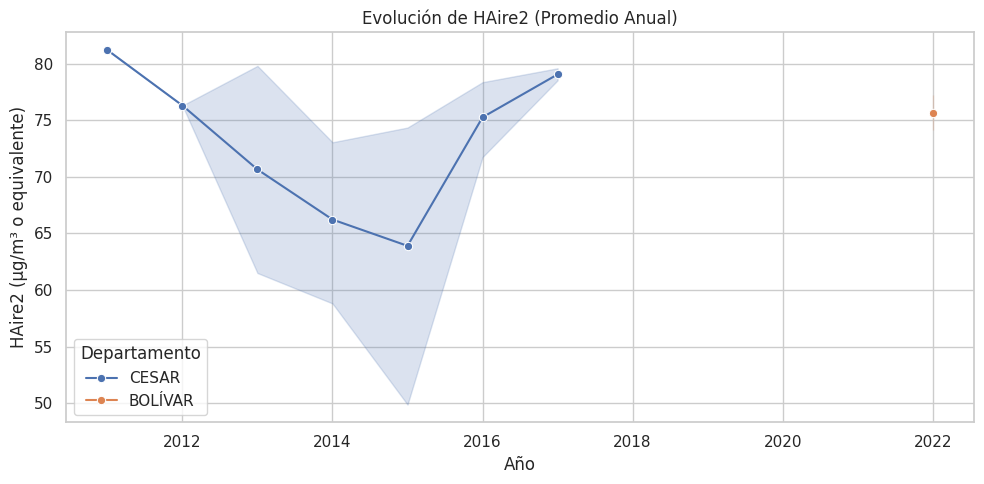

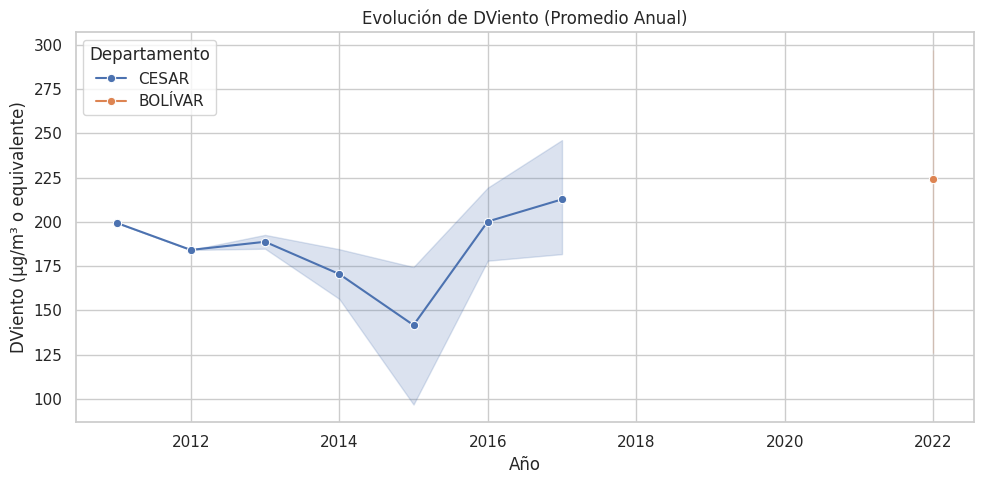

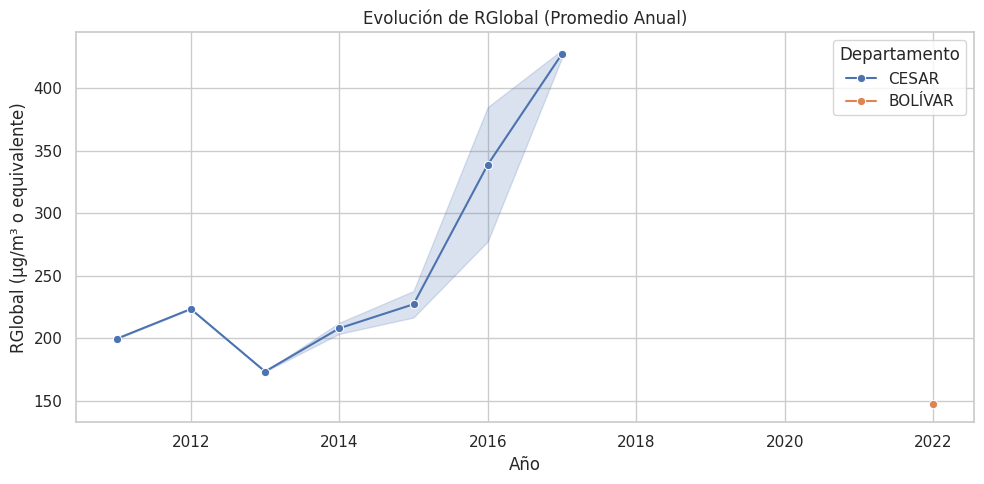

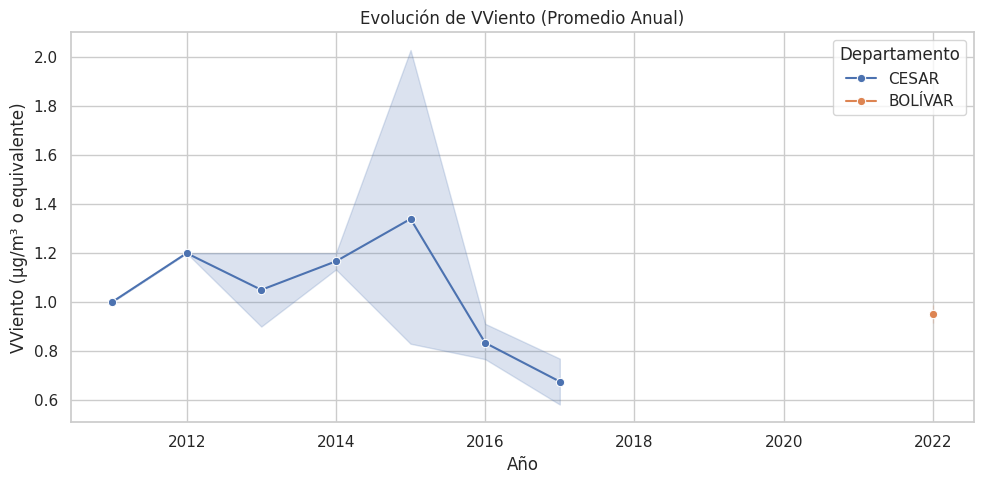

In [18]:
# Evolución temporal de cada contaminante por departamento
for contaminante in contaminantes:
    if contaminante in df_aire['variable'].unique():
        plt.figure(figsize=(10, 5))
        sns.lineplot(
            data=df_aire[df_aire['variable'] == contaminante],
            x='anio',
            y='promedio',
            hue='departamento',
            marker='o'
        )
        plt.title(f'Evolución de {contaminante} (Promedio Anual)')
        plt.xlabel('Año')
        plt.ylabel(f'{contaminante} (µg/m³ o equivalente)')
        plt.legend(title='Departamento')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Contaminante '{contaminante}' no encontrado en el dataset.")

In [19]:
# Transforma los datos para que cada contaminante sea una columna
df_pivot = df_aire.pivot_table(
    index=['departamento', 'anio'],
    columns='variable',
    values='promedio',
    aggfunc='mean'  # promedia si hay varias estaciones por depto-año
).reset_index()

In [20]:
# Calcular promedio general por departamento
df_promedios = df_pivot.groupby('departamento').mean(numeric_only=True).reset_index()

In [21]:
df_promedios

variable,departamento,anio,CO,DViento,HAire2,NO2,O3,P,PLiquida,PM10,PM2.5,PST,RGlobal,SO2,TAire2,VViento
0,BOLÍVAR,2017.857143,483.258333,224.30000,75.675000,10.8,30.208333,741.833333,NaN,46.481667,19.971429,NaN,147.450000,6.416667,28.216667,0.950000
1,CESAR,2017.000000,NaN,185.30246,73.226429,NaN,NaN,753.469286,3.707381,36.719011,15.389386,82.064747,256.885714,NaN,28.532143,1.037857
2,CÓRDOBA,2017.500000,1375.825000,NaN,NaN,NaN,50.592500,NaN,NaN,35.302232,12.533631,43.400000,NaN,15.737500,NaN,NaN


In [22]:
df_promedios.columns.name = None  # quita el nombre del índice de columnas

In [23]:
# Elimina 'Año' antes de promediar
df_promedios = df_pivot.drop(columns='anio').groupby('departamento').mean(numeric_only=True).reset_index()

In [24]:
df_promedios

variable,departamento,CO,DViento,HAire2,NO2,O3,P,PLiquida,PM10,PM2.5,PST,RGlobal,SO2,TAire2,VViento
0,BOLÍVAR,483.258333,224.30000,75.675000,10.8,30.208333,741.833333,NaN,46.481667,19.971429,NaN,147.450000,6.416667,28.216667,0.950000
1,CESAR,NaN,185.30246,73.226429,NaN,NaN,753.469286,3.707381,36.719011,15.389386,82.064747,256.885714,NaN,28.532143,1.037857
2,CÓRDOBA,1375.825000,NaN,NaN,NaN,50.592500,NaN,NaN,35.302232,12.533631,43.400000,NaN,15.737500,NaN,NaN


In [25]:
df_barplot = df_promedios.melt(
    id_vars='departamento',
    var_name='Contaminante',
    value_name='Valor promedio'
)

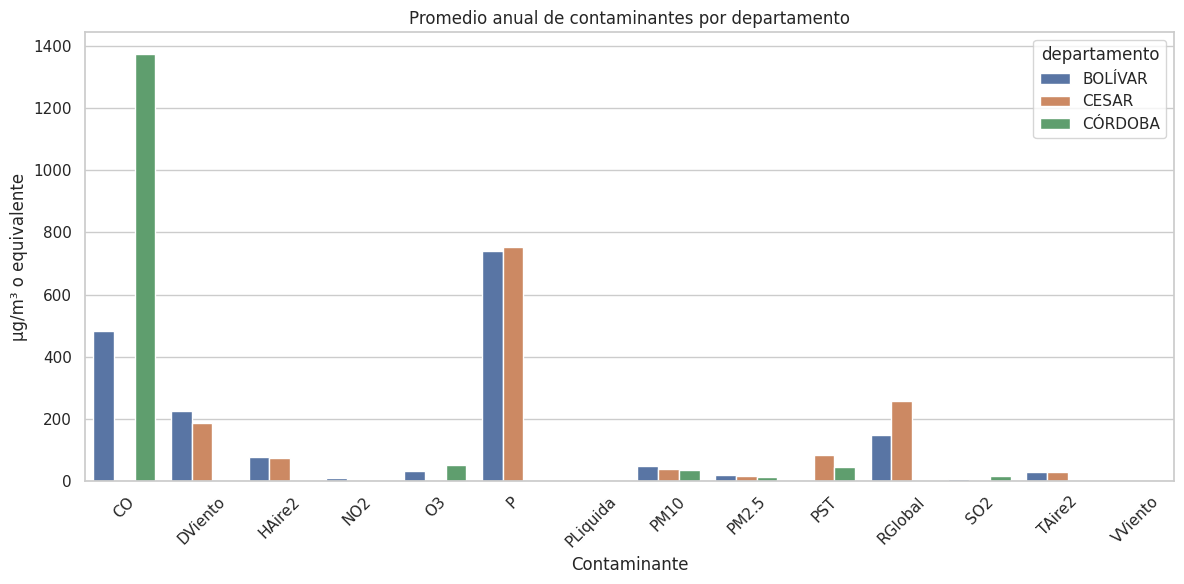

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_barplot,
    x='Contaminante',
    y='Valor promedio',
    hue='departamento'
)
plt.title('Promedio anual de contaminantes por departamento')
plt.ylabel('µg/m³ o equivalente')
plt.xlabel('Contaminante')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
df_barplot = (
    df_aire.groupby(['anio', 'variable', 'departamento'])['promedio']
    .mean()
    .reset_index()
    .rename(columns={'variable': 'Contaminante', 'promedio': 'Valor promedio'})
)

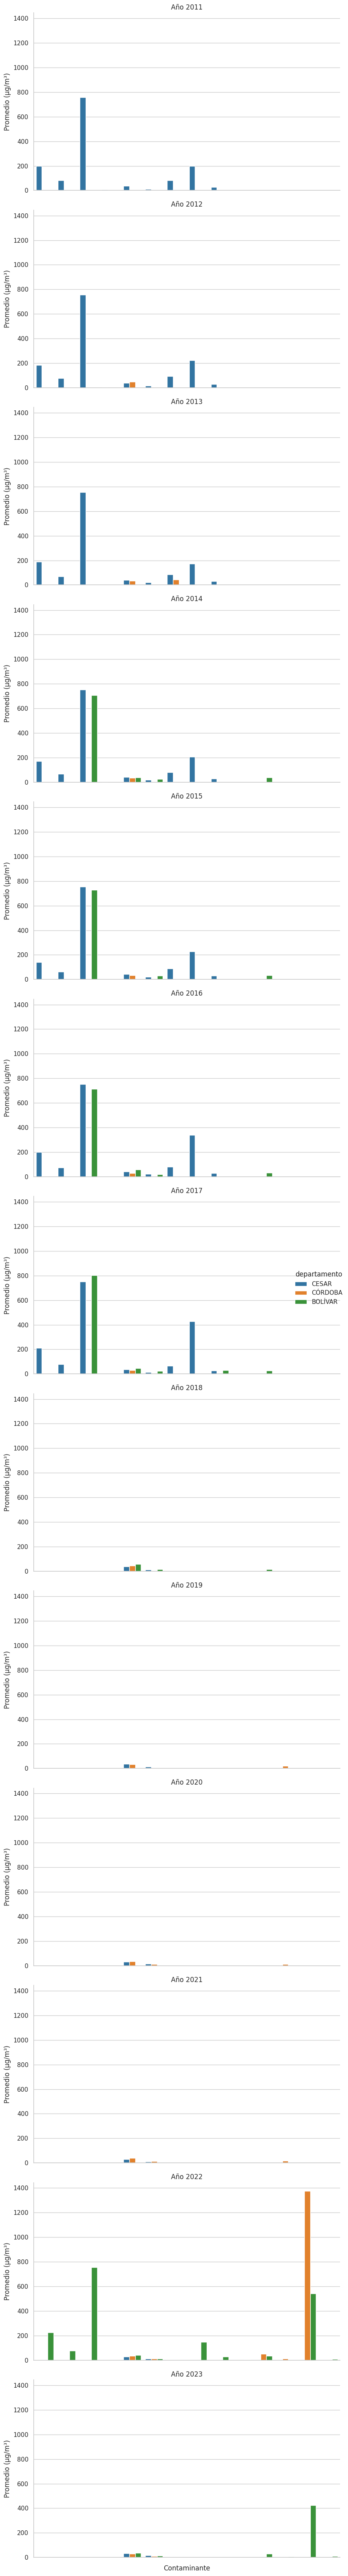

In [28]:
# Crear gráfico múltiple por año
g = sns.catplot(
    data=df_barplot,
    kind="bar",
    x="Contaminante",
    y="Valor promedio",
    hue="departamento",
    col="anio",               # Un gráfico por año
    col_wrap=1,               # Número de gráficos por fila
    height=5,
    aspect=1.5,
    palette="tab10"
)

g.set_titles("Año {col_name}")
g.set_axis_labels("Contaminante", "Promedio (µg/m³)")
g.set_xticklabels(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
df_melt = df_promedios.melt(id_vars=['departamento'], var_name='variable', value_name='valor')
df_melt = df_melt.dropna(subset=['valor'])

In [30]:
df_promedios.columns

Index(['departamento', 'CO', 'DViento', 'HAire2', 'NO2', 'O3', 'P', 'PLiquida',
       'PM10', 'PM2.5', 'PST', 'RGlobal', 'SO2', 'TAire2', 'VViento'],
      dtype='object', name='variable')

In [31]:
print(df_melt.shape)
df_melt.head()

(28, 3)


,departamento,variable,valor
0,BOLÍVAR,CO,483.258333
2,CÓRDOBA,CO,1375.825000
3,BOLÍVAR,DViento,224.300000
4,CESAR,DViento,185.302460
6,BOLÍVAR,HAire2,75.675000


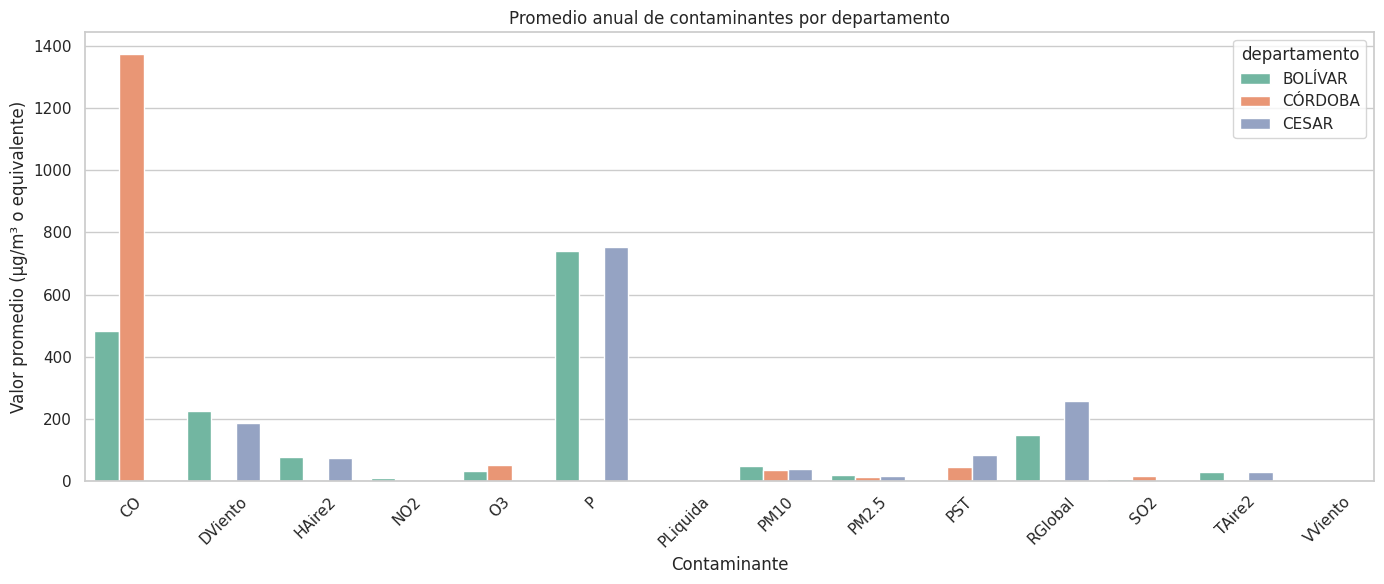

In [32]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=df_melt,
    x='variable',
    y='valor',
    hue='departamento',
    palette='Set2'
)

plt.title('Promedio anual de contaminantes por departamento')
plt.xlabel('Contaminante')
plt.ylabel('Valor promedio (µg/m³ o equivalente)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()